# Dimensionality Reduction

Dimensionality reduction is a technique used to reduce the number of features in a dataset while preserving the most important information. It is a way to reduce the complexity of a dataset and to make it easier to understand and visualize.

**Why is Dimensionality Reduction Important?**

1. **Data Visualization**: Dimensionality reduction makes it possible to visualize high-dimensional data in a lower-dimensional space. This is useful for understanding the structure of the data and for finding patterns and relationships between variables.

2. **Computational Efficiency**: High-dimensional data can be computationally expensive to process. Dimensionality reduction can help to reduce the computational complexity of machine learning algorithms.

3. **Noise Reduction**: High-dimensional data can be noisy and contain a lot of irrelevant information. Dimensionality reduction can help to remove this noise and focus on the most important information.

4. **Feature Extraction**: Dimensionality reduction can be used to extract important features from a dataset. This can be useful for machine learning algorithms that require a smaller number of features.

**How does Dimensionality Reduction Work?**

Dimensionality reduction techniques can be broadly categorized into two types:

1. **Feature Selection**: Feature selection is the process of selecting a subset of the original features in a dataset. This is done by removing the least important features or by combining multiple features into a single feature.

2. **Feature Extraction**: Feature extraction is the process of transforming the original features into a new set of features. This is done by combining the original features in a way that preserves the most important information.

**Common Dimensionality Reduction Techniques**

1. **Principal Component Analysis (PCA)**: PCA is a linear dimensionality reduction technique that identifies the directions in a dataset that maximize the variance. The first principal component is the direction that maximizes the variance, and the second principal component is the direction that maximizes the variance orthogonal to the first principal component, and so on.

2. **Linear Discriminant Analysis (LDA)**: LDA is a linear dimensionality reduction technique that identifies the directions in a dataset that maximize the between-class variance and minimize the within-class variance.

2. **Feature Extraction**: Feature extraction is the process of transforming the original features into a new set of features. This is done by combining the original features in a way that preserves the most important information.


## Principal Component Analysis (PCA)

PCA is a linear dimensionality reduction technique that identifies the directions in a dataset that maximize the variance. The first principal component is the direction that maximizes the variance, and the second principal component is the direction that maximizes the variance orthogonal to the first principal component, and so on.

**How does PCA work?**

1. **Standardize the data**: PCA is sensitive to the scale of the data, so it is important to standardize the data before applying PCA.

2. **Compute the covariance matrix**: The covariance matrix is a measure of the relationship between the features.
3. **Compute the eigenvectors and eigenvalues**: The eigenvectors and eigenvalues of the covariance matrix are the directions and magnitudes of the principal components.
4. **Sort the eigenvectors by eigenvalues**: The eigenvectors are sorted by the eigenvalues in descending order. The eigenvectors with the highest eigenvalues are the most important.
5. **Select the top k eigenvectors**: The top k eigenvectors are selected to form a new set of features.
6. **Transform the data**: The data is transformed into the new set of features.
   
**How to choose the number of principal components?**

The number of principal components is chosen by the user based on the amount of variance they want to preserve. The variance preserved is the sum of the eigenvalues of the principal components.



Out of the $m$ independent variables, PCA selects $n < m$ new independent variables that explain the most variance **regardless of the dependent variable.** 
Since dependent variable is not considered, PCA is an unsupervised model. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Wine.csv')
X = df.iloc[:, :13].values   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 13].values

df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [4]:
# Always scale data for good results on PCA
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit_transform(X_train)
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.36556147 0.18957142 0.11037817 0.0750623  0.06471164 0.05254091
 0.04249714 0.02604785 0.02073041 0.01822301 0.01659873 0.01061887
 0.00745808]


In [6]:
# Extract top 2 principal components

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.36556147 0.18957142]


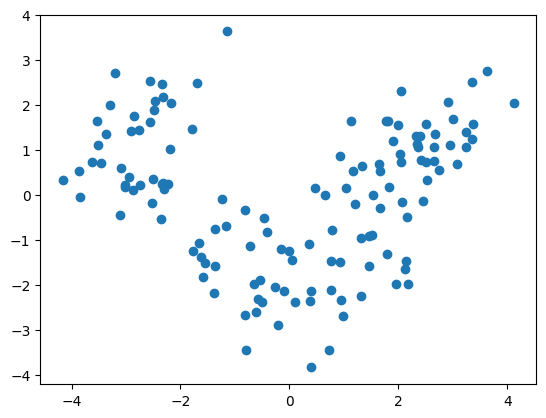

In [7]:
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train])
plt.show()

In [8]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [14]:
y_pred = clf.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 1, 20,  0],
       [ 0,  0, 10]])

In [16]:
clf.score(X_test, y_test)

0.9777777777777777

/var/folders/7m/04ssj6n96q984_6wsnr60dg00000gn/T/ipykernel_99097/1496443826.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


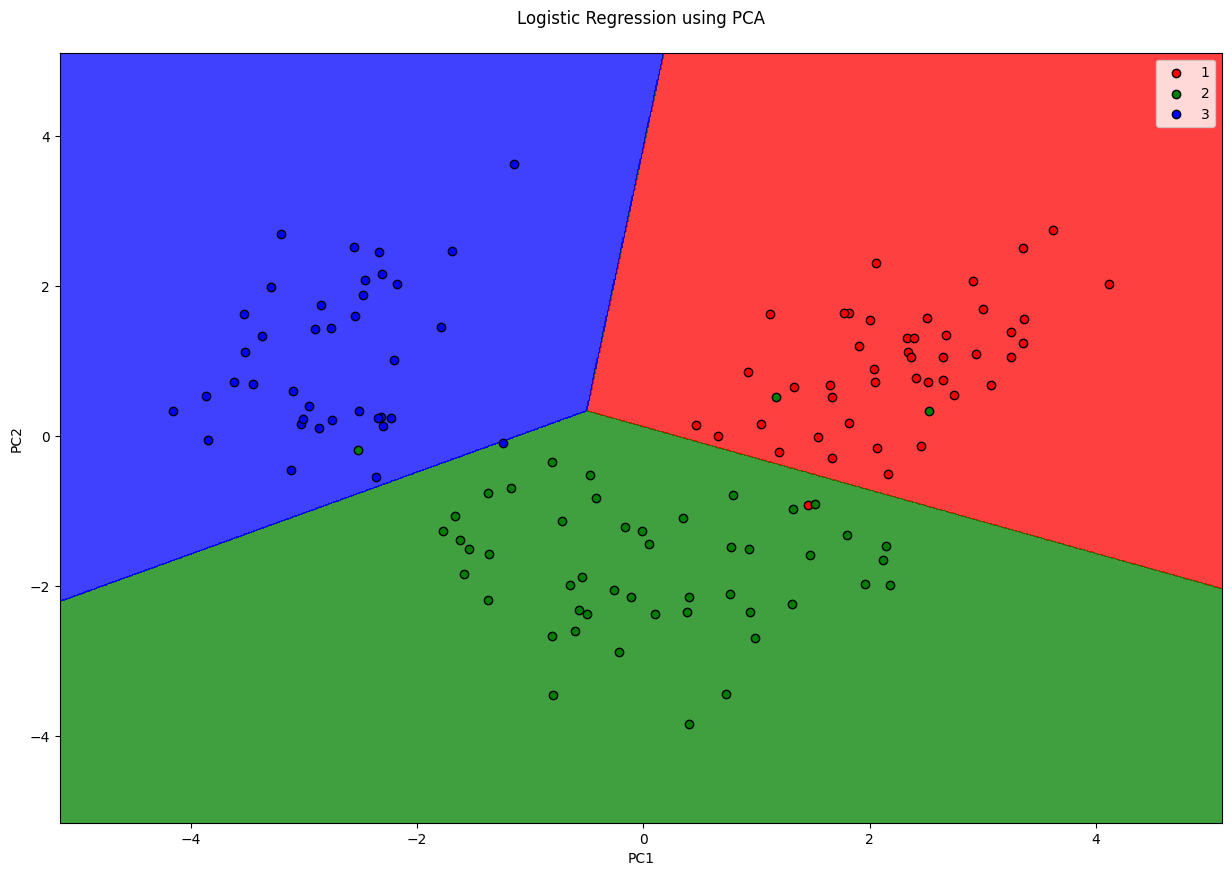

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
fig = plt.figure(figsize=(15, 10))
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green', 'blue'))(i), label=j, edgecolor='black')
plt.xlim(X1.min(), X1.max())
plt.legend()
plt.ylim(X2.min(), X2.max())
plt.title('Logistic Regression using PCA\n')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Linear Discriminant Analysis

PCA tries to find the split that maximises the variance, but it ignores the class lables (Thus, is unsupervised) But often dimensionality reduction is followed by classification, so the DR step is useless if it doesn't do any good to classification. Hence, keeping that in mind, LDA tries to find a split that maximises the separation of the classes.

Since LDA respects the output classes, LDA is a supervised dimensionality reduction model. 

![lda.png](https://sebastianraschka.com/images/blog/2014/linear-discriminant-analysis/lda_1.png)

Source: http://sebastianraschka.com/Articles/2014_python_lda.html

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Wine.csv')
X = df.iloc[:, :13].values   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 13].values

df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [19]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [20]:
# Scale
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
# since LDA is supervised, also need to pass y_train
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


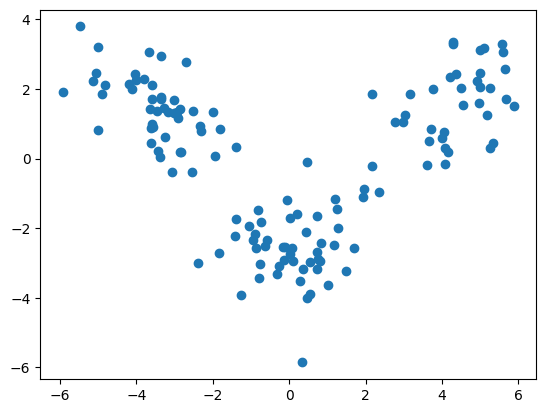

In [22]:
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train])
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0,  0],
       [ 0, 21,  0],
       [ 0,  0, 12]])

In [24]:
clf.score(X_test, y_test)

1.0

/var/folders/7m/04ssj6n96q984_6wsnr60dg00000gn/T/ipykernel_99097/84431311.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


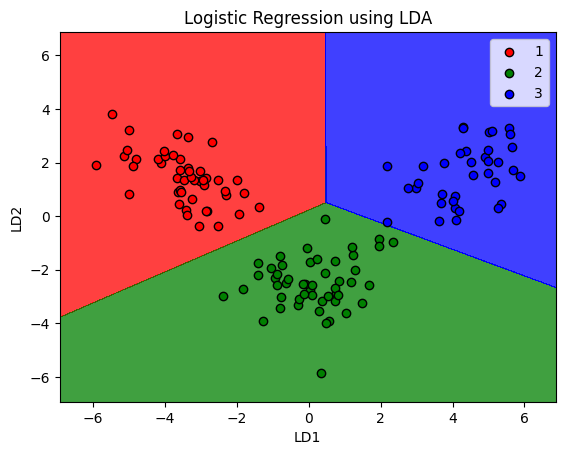

In [25]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green', 'blue'))(i), label=j, edgecolor='black')
plt.xlim(X1.min(), X1.max())
plt.legend()
plt.ylim(X2.min(), X2.max())
plt.title('Logistic Regression using LDA')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

Note that LDA does not guarantee working in every scenario. It fails when the disriminant information is not in the mean, but variance (where PCA would outperform LDA)

## Factor Analysis

Factor analysis is a probabilistic model which is similar to PCA (as in, the output is nearly the same) but works fundamentally different from PCA. FA assumes that there are only $M$ important features in the dataset, and a linear combination of these plus some noise is responsible for the dataset. These features are called __latent features__. One drawback of using FA over PCA is, you don't know how many features you ought to select. For instance, you can use `PCA.explained_variance_ratio_`, FA won't have anything like that. 

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Wine.csv')
X = df.iloc[:, :13].values   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 13].values

df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [27]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [28]:
# Always scale data for good results on PCA
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

In [29]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2)
X_train = fa.fit_transform(X_train)
X_test = fa.transform(X_test)

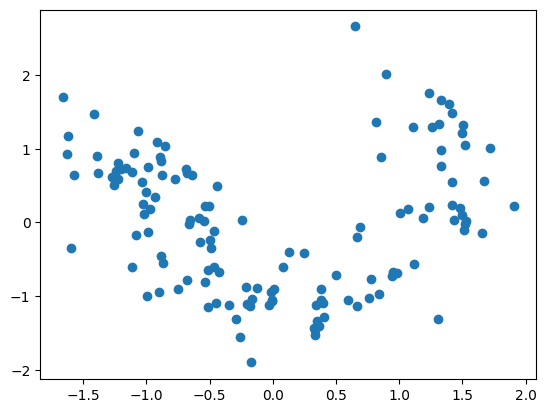

In [30]:
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train])
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [32]:
y_pred = clf.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  1,  0],
       [ 2, 12,  1],
       [ 0,  0, 16]])

In [34]:
clf.score(X_test, y_test)

0.9111111111111111

/var/folders/7m/04ssj6n96q984_6wsnr60dg00000gn/T/ipykernel_99097/2865190982.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


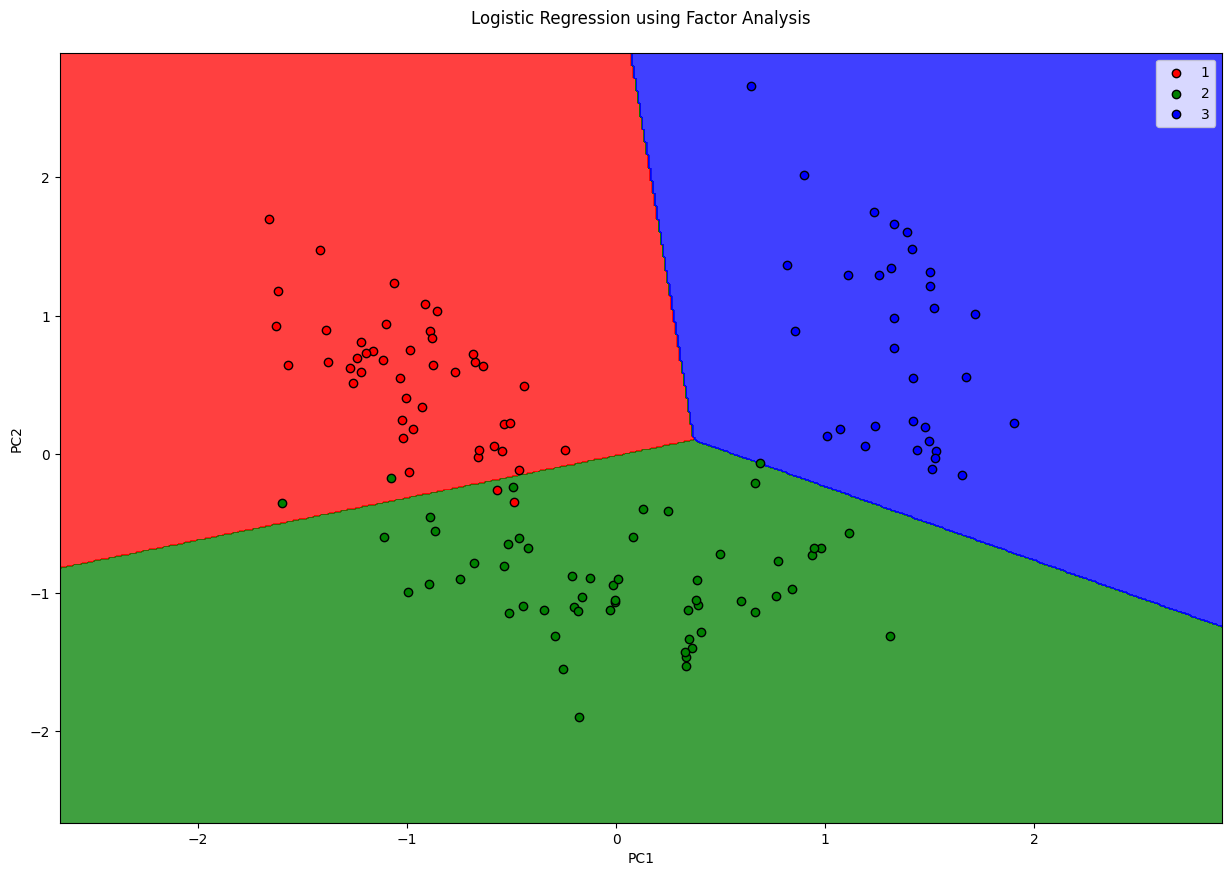

In [35]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
fig = plt.figure(figsize=(15, 10))
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green', 'blue'))(i), label=j, edgecolor='black')
plt.xlim(X1.min(), X1.max())
plt.legend()
plt.ylim(X2.min(), X2.max())
plt.title('Logistic Regression using Factor Analysis\n')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Kernel PCA
PCA and LDA work well when the data is linearly separable. In case they are not, then you'll get poor results. Kernel PCA maps the input data into higher dimension and linearly separates them in the other dimension, hence, making them suitable for non-linearly separable data. This also enables linear models like `LogisticRegression` to work with non-linear data. 


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, 2:4]   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 4]

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [37]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [38]:
# Scale
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

In [39]:
# Applying kernel PCA
from sklearn.decomposition import KernelPCA as KPCA
kpca = KPCA(n_components=2, kernel='rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)


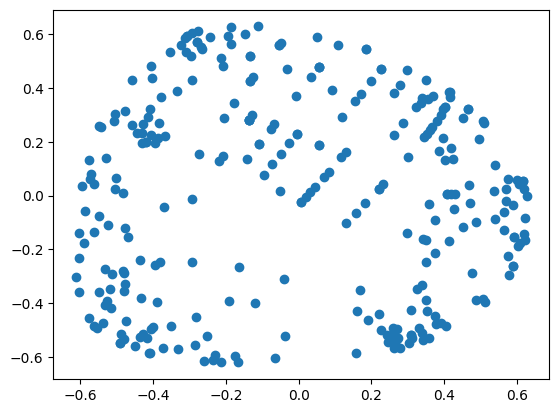

In [40]:
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train])
plt.show()

In [41]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[61,  8],
       [ 5, 26]])

/var/folders/7m/04ssj6n96q984_6wsnr60dg00000gn/T/ipykernel_99097/861490231.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


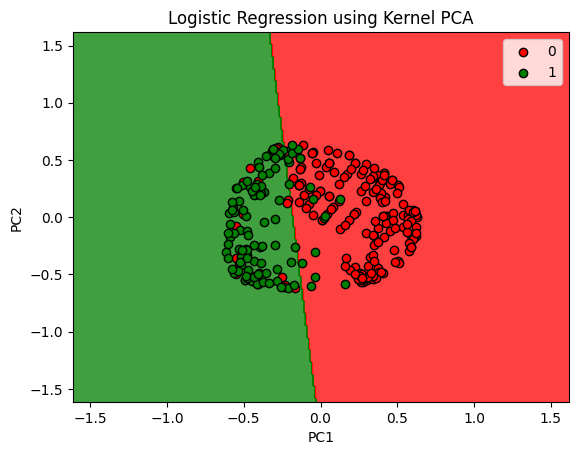

In [42]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j, edgecolor='black')
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.legend()
plt.title('Logistic Regression using Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [43]:
clf.score(X_test, y_test)

0.87

## Truncated SVD

Singluar Value Decomposition is a matrix factorization technique (internally used by PCA). Plain SVD will factor the matrix to have same number of columns. When the number of columns is reduced from $N$ to $M$ that's where the dimentionality is reduced. 

Truncated SVD is nearly the same as PCA. The differences are:
1. PCA doesn't support sparse matrices, truncated SVD does. 
2. PCA is same as SVD on centered-data. SVD needn't centered (that's the reason it accepts sparse matrices)
3. PCA operates on convariance matrix, SVD operates on input matrix directly. (Another reason why PCA needs to perform on entire matrix and can't handle sparse ones)

In practise, SVD is good on huge datasets that cannot be centered because of memory requirements.

Applying truncated SVD to tfidf values is knows as __Latent Semantic Analysis__ Tutorial: [link](http://mccormickml.com/2016/03/25/lsa-for-text-classification-tutorial/)

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Wine.csv')
X = df.iloc[:, :13].values   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 13].values

df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [45]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [46]:
# Always scale data for good results on PCA
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

In [47]:
from sklearn.decomposition import TruncatedSVD

fa = TruncatedSVD(n_components=2)
X_train = fa.fit_transform(X_train)
X_test = fa.transform(X_test)

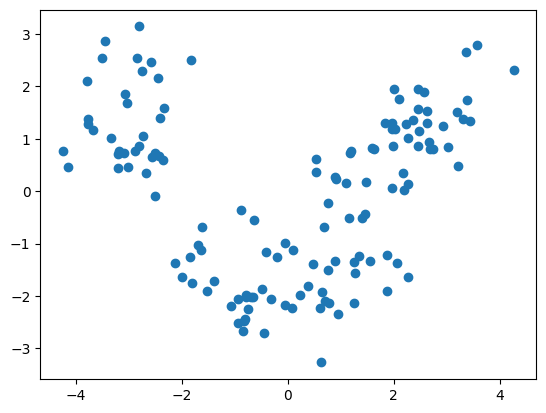

In [48]:
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train])
plt.show()

In [49]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [50]:
y_pred = clf.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 1, 14,  1],
       [ 0,  0, 15]])

In [52]:
clf.score(X_test, y_test)

0.9555555555555556

/var/folders/7m/04ssj6n96q984_6wsnr60dg00000gn/T/ipykernel_99097/877933891.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


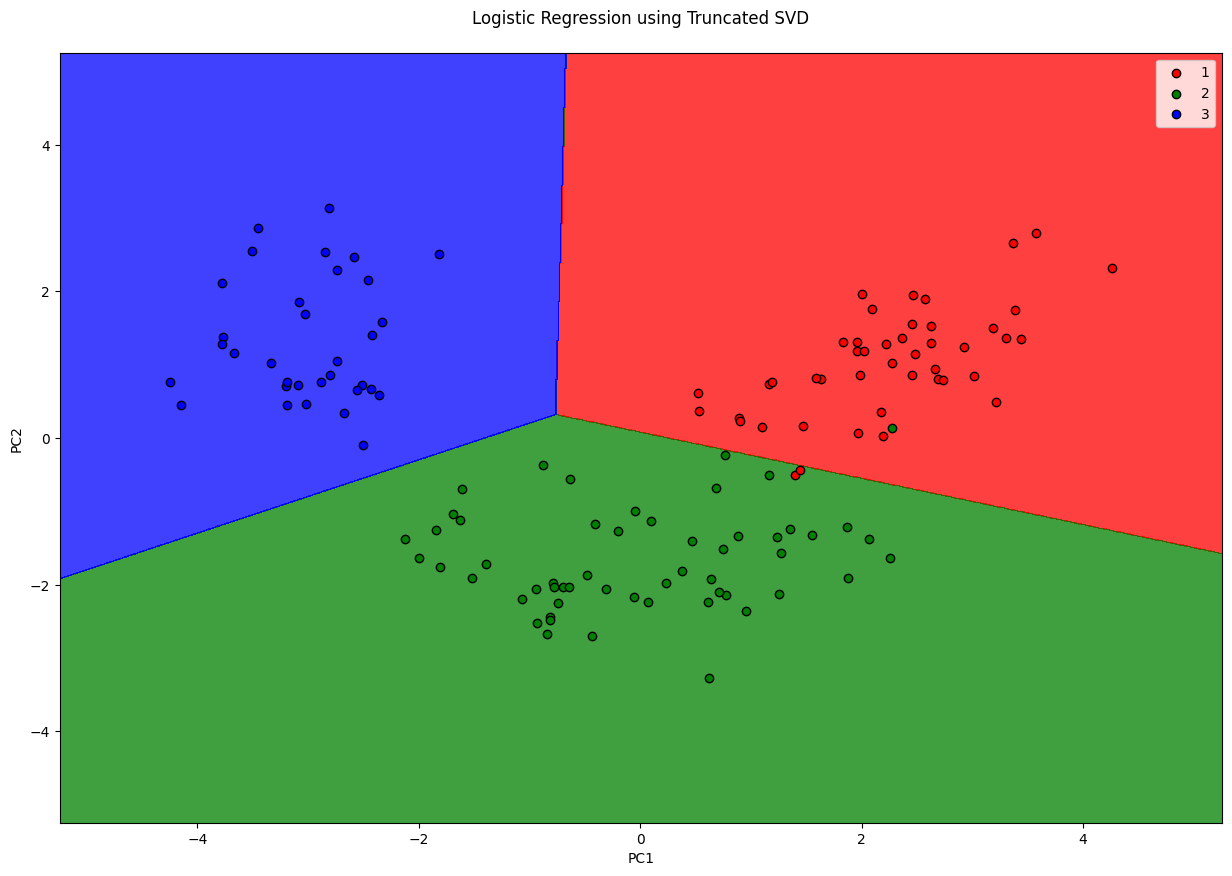

In [53]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
fig = plt.figure(figsize=(15, 10))
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green', 'blue'))(i), label=j, edgecolor='black')
plt.xlim(X1.min(), X1.max())
plt.legend()
plt.ylim(X2.min(), X2.max())
plt.title('Logistic Regression using Truncated SVD\n')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Self Organizing Maps

SOMs are unsupervised models for dimensionality reduction. They maps higher dimension data to 2D to visualise it. 

Nice blog that explains the working: [AI junkie](http://www.ai-junkie.com/ann/som/som1.html)

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Credit_Card_Applications.csv')
print(dataset.head())
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(-1, 1)

   CustomerID  A1     A2     A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0    15776156   1  22.08  11.46   2   4   4  1.585   0   0    0    1    2   
1    15739548   0  22.67   7.00   2   8   4  0.165   0   0    0    0    2   
2    15662854   0  29.58   1.75   1   4   4  1.250   0   0    0    1    2   
3    15687688   0  21.67  11.50   1   5   3  0.000   1   1   11    1    2   
4    15715750   1  20.17   8.17   2   6   4  1.960   1   1   14    0    2   

   A13   A14  Class  
0  100  1213      0  
1  160     1      0  
2  280     1      0  
3    0     1      1  
4   60   159      1  


In [55]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [56]:
from minisom import MiniSom
# x and y are the dimension of SOM (rows, columns)
# input_length is the dimensionality of your data
som = MiniSom(x=10, y=10, input_len=15)
som.random_weights_init(X)
som.train_random(X, num_iteration=100)

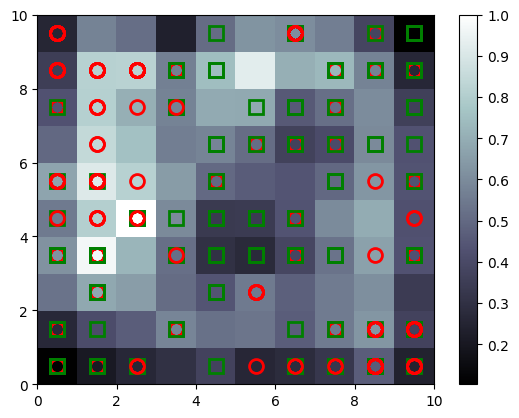

In [57]:
%matplotlib inline

# visualizing SOM
from pylab import bone, pcolor, colorbar, plot, show
# bone will just create a window
bone()
# add the winning nodes
pcolor(som.distance_map().T)
# display legend 
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for indx, row in enumerate(X):
    winning_node = som.winner(row)
    # plot square or circle for the winning node
    # additional 0.5 is for padding
    # markers will be O for 0 and S for 1
    # same with the colors
    plot(winning_node[0] + 0.5, winning_node[1] + 0.5, 
         markers[y[indx][0]], markeredgecolor=colors[y[indx][0]],
         markerfacecolor='None', markersize=10, markeredgewidth=2)

In [58]:
y.shape

(690, 1)

## Dictionary Learning

Dictionary Learning converts high dimensional feautures into sparse features (where most of the values are 0). It does so by learning a dictionary (small number of elements) and representing the entire dataset as a combination of this dictionary. For instance, representing a digit based on few number of ink strokes. This is sort of similar to what AutoEncoders do. Keep in mind that Dictionary Learning requires large amount of data so that they learn accurate representations of input. 

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Wine.csv')
X = df.iloc[:, :13].values   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 13].values

df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [60]:
# Split in training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [61]:
# Always scale data for good results on DL
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

In [62]:
from sklearn.decomposition import DictionaryLearning

fa = DictionaryLearning(n_components=2)
X_train = fa.fit_transform(X_train)
X_test = fa.transform(X_test)

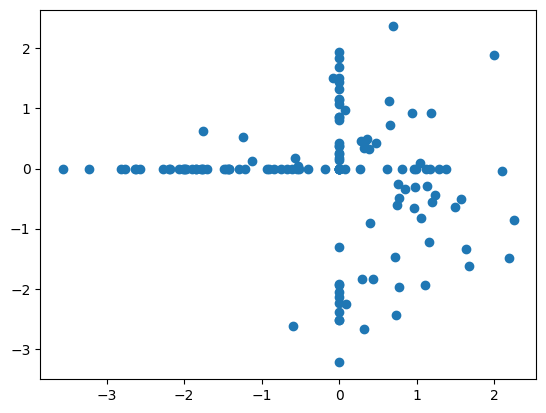

In [63]:
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train])
plt.show()

In [64]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [65]:
y_pred = clf.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  2,  0],
       [ 0, 17,  4],
       [ 0,  0,  9]])

In [67]:
clf.score(X_test, y_test)

0.8666666666666667

/var/folders/7m/04ssj6n96q984_6wsnr60dg00000gn/T/ipykernel_99097/1400355220.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


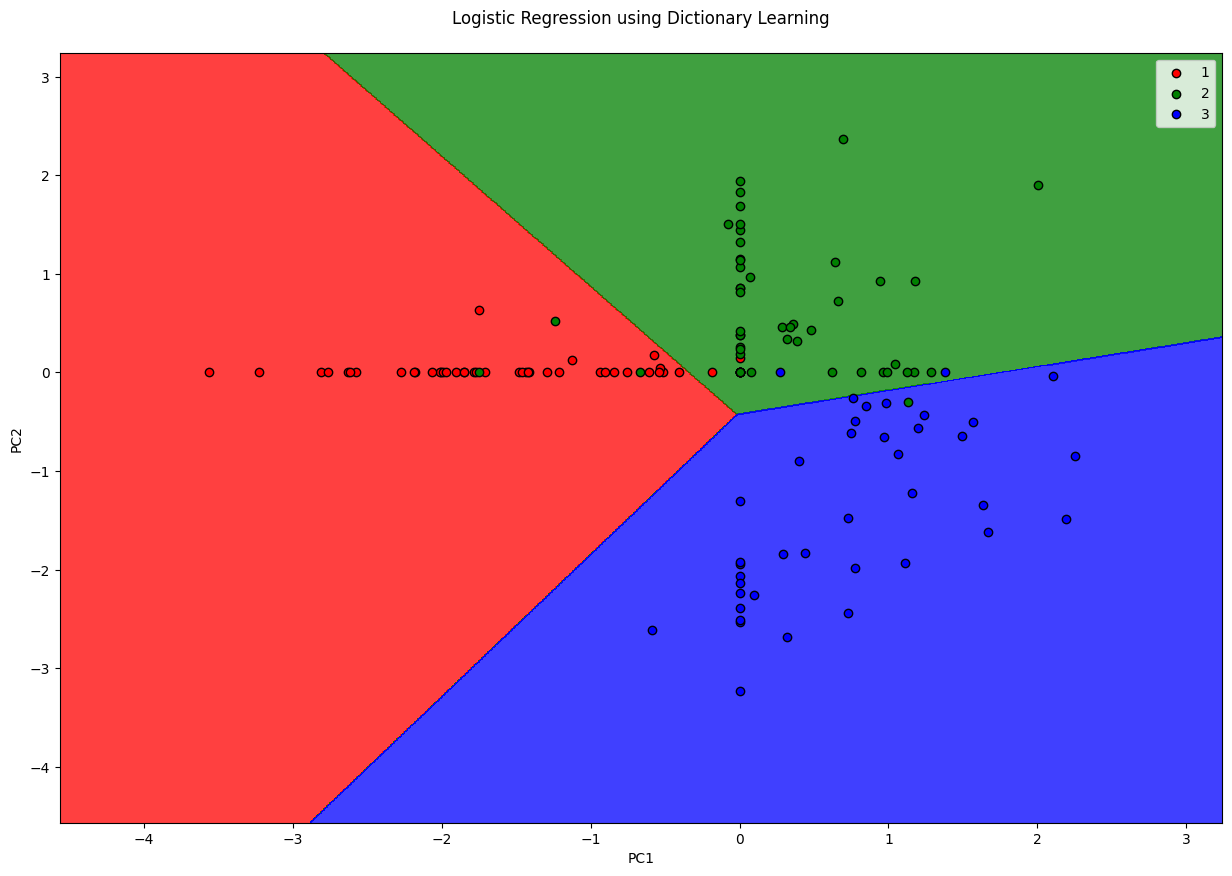

In [68]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
fig = plt.figure(figsize=(15, 10))
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green', 'blue'))(i), label=j, edgecolor='black')
plt.xlim(X1.min(), X1.max())
plt.legend()
plt.ylim(X2.min(), X2.max())
plt.title('Logistic Regression using Dictionary Learning\n')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## t-distributed Stochastic Neighbor Embedding

Dimensionality Reduction techniques like PCA, LDA are linear techniques, i.e. they do not produce a good representation if the underlying data is non-linear. t-SNE is a supervised non-linear dimensionality reduction technique.

Working of tSNE:
tSNE converts the distance between neighbors to probabilites. For every point there's a Gaussian represented, so for every other point it calculates the probability that the other point can be a neighbor. As a result, far points are repelled and near points are brought closer. This is a simple yet powerful technique that preserves the clustering even in lower dimension. 


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Wine.csv')
X = df.iloc[:, :13].values   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 13].values

df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [70]:
# Always scale data for good results on PCA
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X = X_sca.fit_transform(X)

In [71]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X = tsne.fit_transform(X)

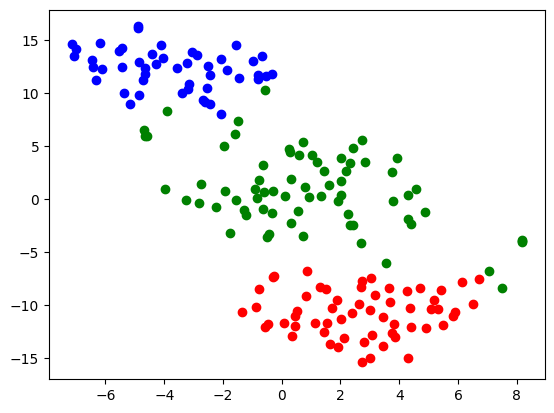

In [72]:
plt.scatter([x[0] for x in X[y==1]], [x[1] for x in X[y==1]], color='red')
plt.scatter([x[0] for x in X[y==2]], [x[1] for x in X[y==2]], color='green')
plt.scatter([x[0] for x in X[y==3]], [x[1] for x in X[y==3]], color='blue')
plt.show()

In [73]:
# another example
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, 2:4]   # Using 1:2 as indices will give us np array of dim (10, 1)
y = df.iloc[:, 4]

X_sca = StandardScaler()
X = X_sca.fit_transform(X)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [74]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X = tsne.fit_transform(X)